In [ ]:
import sys
import math

# Auto-generated code below aims at helping you parse
# the standard input according to the problem statement.

class Batman():
    def __init__(self):
        self.x = 0
        self.y = 0
        self.build_width = 0
        self.build_height = 0
        self.x_move_size = 1
        self.y_move_size = 1
    def move(self,x_move,y_move):
        if self.x + x_move < 0 or self.x + x_move > self.build_width:
            print("Error: this move (x="+str(x_move)+") brings Batman off the building: width = "+str(self.build_width)+" but Batman's new position is "+str(self.x+x_move))
        else:
            self.x = self.x + x_move
        if self.y + y_move < 0 or self.y + y_move > self.build_height:
            print("Error: this move (x="+str(y_move)+") brings Batman off the building: height = "+str(self.build_height)+" but Batman's new position is "+str(self.y+y_move))
        else:
            self.y = self.y + y_move
    def set_move_size(self):
        if self.build_width > 10:
            self.x_move_size = round(self.build_width/2)
        else:
            self.x_move_size = 1
        if self.build_height > 10:
            self.y_move_size = round(self.build_height/2)
        else:
            self.y_move_size = 1
    def update_move_size(self):
        if self.build_width - self.x > self.x_move_size or self.x > self.x_move_size:
            self.x_move_size = round((self.build_width - self.x)/2)
        else:
            self.x_move_size = round(self.x_move_size/2)
        if self.build_height - self.y > self.y_move_size or self.y > self.y_move_size:
            self.y_move_size = round((self.build_height - self.y)/2)
        else:
            self.y_move_size = round(self.y_move_size/2)
        if self.x_move_size < 1:
            self.x_move_size = 1
        if self.y_move_size < 1:
            self.y_move_size = 1
    def get_move(self,bomb_direction):
        x_move, y_move = 0, 0
        if "U" in bomb_direction:
            y_move = -1*self.y_move_size
        if "D" in bomb_direction:
            y_move = 1*self.y_move_size
        if "R" in bomb_direction:
            x_move = 1*self.x_move_size
        if "L" in bomb_direction:
            x_move = -1*self.x_move_size
        return(x_move,y_move)

# w: width of the building.
# h: height of the building.
w, h = [int(i) for i in input().split()]
n = int(input())  # maximum number of turns before game over.
x0, y0 = [int(i) for i in input().split()]
batman = Batman()
batman.x = x0
batman.y = y0
batman.build_width = w - 1
batman.build_height = h - 1
batman.set_move_size()
# game loop
while True:
    bomb_dir = input()  # the direction of the bombs from batman's current location (U, UR, R, DR, D, DL, L or UL)
    #print(bomb_dir)
    x_move,y_move = batman.get_move(bomb_dir)
    #print(x_move,y_move)
    batman.move(x_move,y_move)
    batman.update_move_size()
    # Write an action using print
    # To debug: print("Debug messages...", file=sys.stderr, flush=True)


    # the location of the next window Batman should jump to.
    print(str(batman.x)+" "+str(batman.y))

5014 5037
55 < x < 9998
78 < y < 9998
7494 7517
5015 < x < 9998
5038 < y < 9998
6253 6276
5015 < x < 7493
5038 < y < 7516
6872 5656
6254 < x < 7493
5038 < y < 6275
6562 5965
6254 < x < 6871
5657 < y < 6275
6717 6120
6563 < x < 6871
5966 < y < 6275
6639 6197
6563 < x < 6716
6121 < y < 6275
6600 6158
6563 < x < 6638
6121 < y < 6196
6619 6177
6601 < x < 6638
6159 < y < 6196
6619 6166
6159 < y < 6176
6619 6170
6167 < y < 6176
6619 6172
Batman defused the bomb in 12 moves
Batman's final coordinates are: 6619 6172
The bomb's coordinates are: 6619 6172


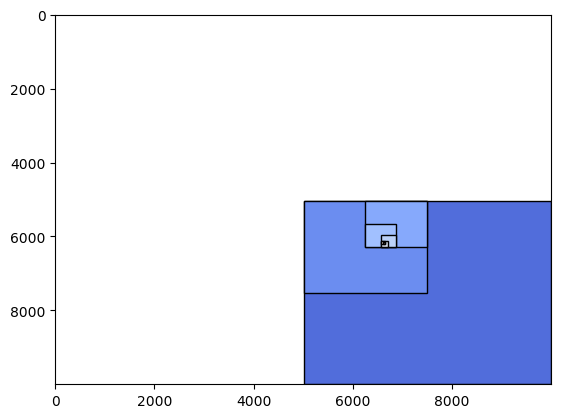

In [58]:
import sys
import math
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Auto-generated code below aims at helping you parse
# the standard input according to the problem statement.

bomb_x_coordinate = 6619
bomb_y_coordinate = 6172

def get_bomb_direction(batman):
    direction = ""
    if batman.x < bomb_x_coordinate:
        direction = direction + "R"
    if batman.x > bomb_x_coordinate:
        direction = direction + "L"
    if batman.y < bomb_y_coordinate:
        direction = direction + "D"
    if batman.y > bomb_y_coordinate:
        direction = direction + "U"
    return(direction)

def on_building(batman,direction):
    on=True
    if direction == "x":
        if batman.build_width - batman.x < batman.x_move_size:
            on=False
        if batman.x < batman.x_move_size:
            on=False
    if direction == "y":
        if batman.build_height - batman.y < batman.y_move_size:
            on=False
        if batman.y < batman.y_move_size:
            on=False
    return(on)

def binary_search(batman):
    m = batman.x_max - batman.x_min + 1
    n = batman.y_max - batman.y_min + 1
    l = 0
    r =  round( m * n - 1 )
    mid = round( ( l + r - 1 ) / 2 )
    new_x = round( mid / m ) - 1 + batman.x_min
    new_y = round( mid / m ) - 1 + batman.y_min
    return(new_x,new_y)
    
def linear_search(batman):
    if batman.x_max - batman.x_min > 50:
        new_x = random.randint(batman.x_min,batman.x_max)
    else:
        new_x = round((batman.x_max + batman.x_min)/2)

    if batman.y_max - batman.y_min > 50:
        new_y = random.randint(batman.y_min,batman.y_max)
    else:
        new_y = round((batman.y_max + batman.y_min)/2)
    return(new_x,new_y)

class Batman():
    def __init__(self,w,h,x0,y0,n):
        self.x_move_size = 1
        self.y_move_size = 1
        self.x_min = 0
        self.y_min = 0
        self.x_known = False
        self.y_known = False
        self.x = x0
        self.y = y0
        self.build_width = w - 1
        self.build_height = h - 1
        self.x_max = self.build_width
        self.y_max = self.build_height
        self.max_moves = n

    def update_min_max(self,direction):
        if len(direction) == 1:
            if direction == "U" or direction == "D":
                self.x_known = True
                self.x_max = self.x
                self.x_min = self.x
                if direction == "U":
                    self.y_max = self.y - 1
                else:
                    self.y_min = self.y + 1
            if direction == "R" or direction == "L":
                self.y_known = True
                self.y_max = self.y
                self.y_min = self.y
                if direction == "R":
                    self.x_min = self.x + 1
                else:
                    self.x_max = self.x - 1
        else:
            if "L" in direction:
                self.x_max = self.x - 1
            if "R" in direction:
                self.x_min = self.x + 1
            if "D" in direction:
                self.y_min = self.y + 1
            if "U" in direction:
                self.y_max = self.y - 1

    def move(self):
        self.get_move()
        if not self.x_known:
            self.x = self.x + self.x_move_size
        if not self.y_known:
            self.y = self.y + self.y_move_size

    def get_move(self):
        #new_x,new_y = linear_search(self)
        new_x,new_y = binary_search(self)
        
        if new_x == self.x:
            if self.build_width > 0:
                if self.x + self.x_move_size > self.build_width or self.x + self.x_move_size < 0:
                    self.x_move_size = 0
                else:
                    self.x_move_size = 1
            else:
                self.x_move_size = 0
        else:
            self.x_move_size = new_x - self.x
        if new_y == self.y:
            if self.build_height > 0:
                if self.y + self.y_move_size > self.build_height or self.y + self.y_move_size < 0:
                    self.y_move_size = 0
                else:
                    self.y_move_size = 1
            else:
                self.y_move_size = 0
        else:
            self.y_move_size = new_y - self.y

# w: width of the building.
# h: height of the building.
w, h = 9999, 9999
n = 14  # maximum number of turns before game over.
x0, y0 = 54, 77
batman = Batman(w,h,x0,y0,n)

#define Matplotlib figure and axis
fig, ax = plt.subplots()
cmap = plt.get_cmap("coolwarm")
slicedCM = cmap(np.linspace(0, 1, n))

i = 1
# game loop
while True and i <= n:
    bomb_dir = get_bomb_direction(batman)  # the direction of the bombs from batman's current location (U, UR, R, DR, D, DL, L or UL)
    #print(bomb_dir)
    batman.update_min_max(bomb_dir)

    #print(batman.x_min,batman.x_max,batman.y_min,batman.y_max)
    #print(x_move,y_move)
    batman.move()
    print(str(batman.x)+" "+str(batman.y))
    if batman.x == bomb_x_coordinate and batman.y == bomb_y_coordinate:
        print("Batman defused the bomb in "+str(i)+" moves")
        break
    if not batman.x_known:
        print(str(batman.x_min)+" < x < "+str(batman.x_max))
    if not batman.y_known:
        print(str(batman.y_min)+" < y < "+str(batman.y_max))

    #add rectangle to plot
    if i > 1:
        ax.add_patch(Rectangle((batman.x_min, batman.y_min), batman.x_max-batman.x_min, batman.y_max-batman.y_min,
             edgecolor = 'black',
             facecolor = slicedCM[i-1],
             fill=True,
             lw=1))
    # Write an action using print
    # To debug: print("Debug messages...", file=sys.stderr, flush=True)
    i = i + 1

print("Batman's final coordinates are: "+str(batman.x)+" "+str(batman.y))
print("The bomb's coordinates are: "+str(bomb_x_coordinate)+" "+str(bomb_y_coordinate))
    # the location of the next window Batman should jump to.
plt.xlim(0,batman.build_height)
plt.ylim(0,batman.build_width)
plt.gca().invert_yaxis()
plt.show()


5026 5038
55 < x < 9998
78 < y < 9998
7512 7518
5027 < x < 9998
5039 < y < 9998
6269 6278
5027 < x < 7511
5039 < y < 7517
6890 5658
6270 < x < 7511
5039 < y < 6277
6580 5968
6270 < x < 6889
5659 < y < 6277
6735 6123
6581 < x < 6889
5969 < y < 6277
6658 6200
6581 < x < 6734
6124 < y < 6277
6619 6162
6581 < x < 6657
6124 < y < 6199
6619 6181
6163 < y < 6199
6619 6172
Batman defused the bomb in 10 moves
Batman's final coordinates are: 6619 6172
The bomb's coordinates are: 6619 6172


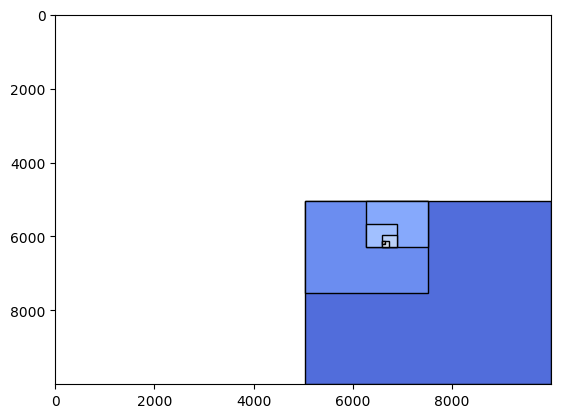

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Auto-generated code below aims at helping you parse
# the standard input according to the problem statement.

bomb_x_coordinate = 6619
bomb_y_coordinate = 6172

# Auto-generated code below aims at helping you parse
# the standard input according to the problem statement.

def binary_search(batman):
    m = batman.x_max - batman.x_min + 1
    n = batman.y_max - batman.y_min + 1
    l = 0
    r =  round( m * n - 1 )
    mid = round( ( l + r - 1 ) / 2 )
    new_x = round( mid / m ) - 1 + batman.x_min
    new_y = round( mid / m ) - 1 + batman.y_min
    return(new_x,new_y)

class Batman():
    def __init__(self,w,h,x0,y0,n):
        self.x_move_size = 1
        self.y_move_size = 1
        self.x_min = 0
        self.y_min = 0
        self.x_known = False
        self.y_known = False
        self.x = x0
        self.y = y0
        self.build_width = w - 1
        self.build_height = h - 1
        self.x_max = self.build_width
        self.y_max = self.build_height
        self.max_moves = n

    def update_min_max(self,direction):
        if len(direction) == 1:
            if direction == "U" or direction == "D":
                self.x_known = True
                self.x_max = self.x
                self.x_min = self.x
                if direction == "U":
                    self.y_max = self.y - 1
                else:
                    self.y_min = self.y + 1
            if direction == "R" or direction == "L":
                self.y_known = True
                self.y_max = self.y
                self.y_min = self.y
                if direction == "R":
                    self.x_min = self.x + 1
                else:
                    self.x_max = self.x - 1
        else:
            if "L" in direction:
                self.x_max = self.x - 1
            if "R" in direction:
                self.x_min = self.x + 1
            if "D" in direction:
                self.y_min = self.y + 1
            if "U" in direction:
                self.y_max = self.y - 1

    def move(self,turn,n):
        self.get_move()
        if not self.x_known:
            self.x = self.x + self.x_move_size
        if not self.y_known:
            self.y = self.y + self.y_move_size

    def get_move(self):
#        if not self.x_known and self.x_max - self.x_min >= 6 and n - turn <= 3:
#            new_x = random.randint(self.x_min,self.x_max)
#        else:
        new_x = round((self.x_max + self.x_min)/2)
      
#        if not self.y_known and self.y_max - self.y_min >= 6 and n - turn <= 3:
#            new_y = random.randint(self.y_min,self.y_max)
#        else:
        new_y = round((self.y_max + self.y_min)/2)

        if new_x == self.x:
            if self.build_width > 0:
                if self.x + self.x_move_size > self.build_width or self.x + self.x_move_size < 0:
                    self.x_move_size = 0
                else:
                    self.x_move_size = 1
            else:
                self.x_move_size = 0
        else:
            self.x_move_size = new_x - self.x
        if new_y == self.y:
            if self.build_height > 0:
                if self.y + self.y_move_size > self.build_height or self.y + self.y_move_size < 0:
                    self.y_move_size = 0
                else:
                    self.y_move_size = 1
            else:
                self.y_move_size = 0
        else:
            self.y_move_size = new_y - self.y

# w: width of the building.
# h: height of the building.
w, h = 9999, 9999
n = 14  # maximum number of turns before game over.
x0, y0 = 54, 77
batman = Batman(w,h,x0,y0,n)

#define Matplotlib figure and axis
fig, ax = plt.subplots()
cmap = plt.get_cmap("coolwarm")
slicedCM = cmap(np.linspace(0, 1, n))

i = 1
# game loop
while True and i <= n:
    bomb_dir = get_bomb_direction(batman)  # the direction of the bombs from batman's current location (U, UR, R, DR, D, DL, L or UL)
    #print(bomb_dir)
    batman.update_min_max(bomb_dir)

    #print(batman.x_min,batman.x_max,batman.y_min,batman.y_max)
    #print(x_move,y_move)
    batman.move(i,n)
    print(str(batman.x)+" "+str(batman.y))
    if batman.x == bomb_x_coordinate and batman.y == bomb_y_coordinate:
        print("Batman defused the bomb in "+str(i)+" moves")
        break
    if not batman.x_known:
        print(str(batman.x_min)+" < x < "+str(batman.x_max))
    if not batman.y_known:
        print(str(batman.y_min)+" < y < "+str(batman.y_max))

    #add rectangle to plot
    if i > 1:
        ax.add_patch(Rectangle((batman.x_min, batman.y_min), batman.x_max-batman.x_min, batman.y_max-batman.y_min,
             edgecolor = 'black',
             facecolor = slicedCM[i-1],
             fill=True,
             lw=1))
    # Write an action using print
    # To debug: print("Debug messages...", file=sys.stderr, flush=True)
    i = i + 1

print("Batman's final coordinates are: "+str(batman.x)+" "+str(batman.y))
print("The bomb's coordinates are: "+str(bomb_x_coordinate)+" "+str(bomb_y_coordinate))
    # the location of the next window Batman should jump to.
plt.xlim(0,batman.build_height)
plt.ylim(0,batman.build_width)
plt.gca().invert_yaxis()
plt.show()